
# Context

This book will consist of all the stuff that I have learnt and help to identify key coding to do data science works. In this context, you can also see some of the markdown coding I use to format the paragraph. Please [refer to this website](https://www.markdownguide.org/cheat-sheet/) for quick guide on some of the tricks.

Some of the basic to cover in this book :

1. Visualisation - Seaborn
2. Visualisation - Matplotlib


> JUST LIKE JIUJITSU, YOU NEED TO KEEP **_PRACTISE_** TO REMEMBER SOME OF THE MOVES


I always forget how to code certain things if I have not touched python for a while. So this book will help me to refresh some of the stuff I have learn over the years.

Some of the questions that always come everytime I forget python :

* How to search string 
* How to do visualisation on certain data 
* Where can I find available data online (built-in) from Python




# Let's start by looking at data in Python via Seaborn datasets

You can do the below codes to get some data from Seaborn such as Titanic or Iris. The full list can be downloaded from the code below.


In [4]:
import seaborn as sns
sns.get_dataset_names()

/Users/ronny/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file /Users/ronny/anaconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

## Example 1 Pairplot

One of the issue I found is with the colour due to my colour blind issue. The good news is you can change the palette using set_palette, in this case rainbow palette seems to work for me.

The pair plot works with Iris due to :
* You can see clustering based on different attributes. May not work on other dataset
* The hue effect to determine the species shows different pairing can determine the seggregation

However, this pairplot does not work well with **Titanic** due to data structure is different. So if you find similar characteristic like Iris, you can use pairplot.


/Users/ronny/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


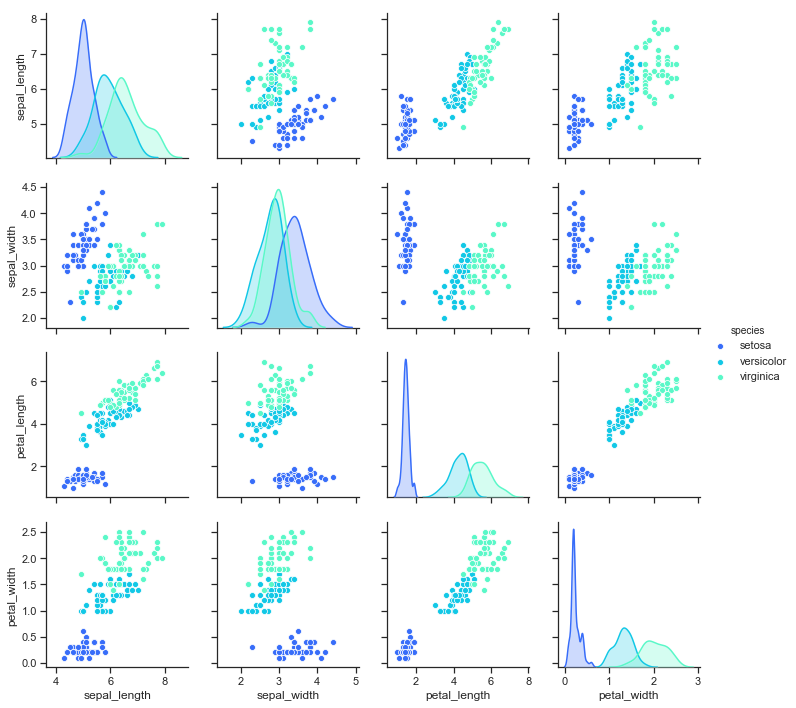

In [23]:
import seaborn as sns
sns.set(style="ticks")
sns.set_palette("rainbow")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

In [31]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


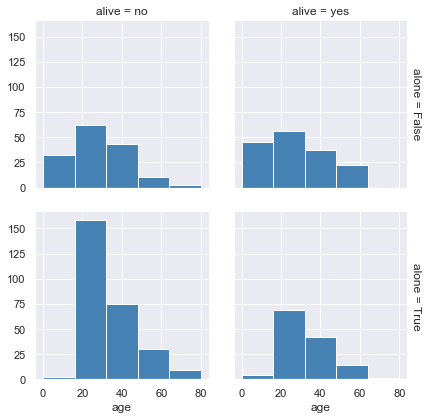

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

titanic = sns.load_dataset("titanic")
g = sns.FacetGrid(titanic, row="alone", col="alive", margin_titles=True)
bins = np.linspace(0, 80, 6)
g.map(plt.hist, "age", color="steelblue",bins=bins)

For categorical data, you can use **catplot** and the palette can be tailored using the following optiosn :
* pastel
* muted
* bright
* colorblind
* dark
* deep


In the two charts below, you can see the difference. The first one showing % of survival by sex and the second one counting the actual numbers.

If you put *kind = bar*, then you need to put x and y value. The Y value is % of survival.  
Otherwise, if *kind = count*, then you only need to put x value since it calculates total only



/Users/ronny/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


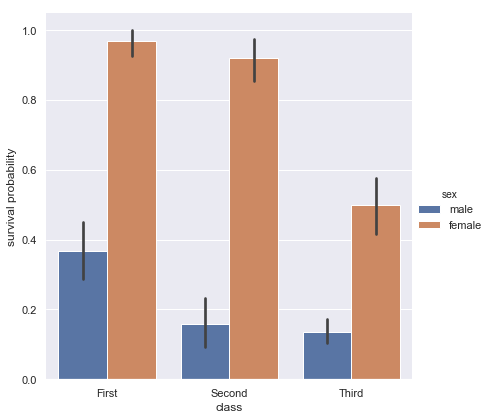

In [58]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="deep")
g.despine(left=True)
g.set_ylabels("survival probability")

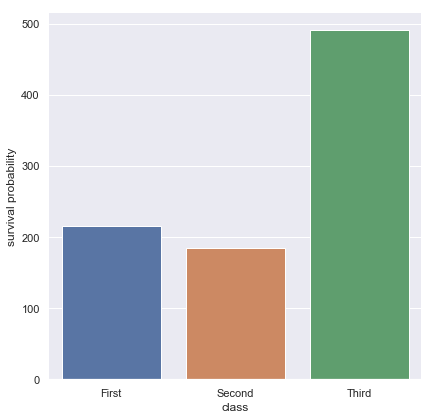

In [60]:
g = sns.catplot(x="class", data=titanic,
                height=6, kind="count", palette="deep")
g.despine(left=True)
g.set_ylabels("survival probability")